In [1]:
!pip install nbimporter

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [6]:
import numpy as np
import nbimporter
from pymatgen.ext.matproj import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [7]:
mp_key = "n522DVkKQfm3sukNMEVKlnOE5jidGbIJ"
mp_id = "mp-2530"

In [8]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
XRD = XRDCalculator(1.54060) # Creation du calculateur avec le rayonnement X incident souhaite.
plan = XRD.get_pattern(conv_struc) # Conv_struc pour pouvoir comparer avec les valeurs dans 'The Materials Project'
hkl = plan.hkls # Liste dont chaque element est un dictionnaire avec les plans hkl et leurs multiplicités.
d_hkl = plan.d_hkls # Liste reprennant la distance entre les plans. 

In [10]:
for i in range(3) : 
    print("\n---------------------------------")
    print("Pic de diffraction n°" + str(i + 1) +".\n")
    print("2\u03F4 = " + str(round(plan.x[i], 4)) + "°")
    print("Intensité (scaled) = " + str(round(plan.y[i], 4)))
    print("(h,k,l) = " +str(hkl[i][0]['hkl']))
    print("Multiplicité = " + str(hkl[i][0]['multiplicity']))
    print("Distance entre les plans = " + str(round(d_hkl[i], 4)) + " Å")


---------------------------------
Pic de diffraction n°1.

2ϴ = 23.6389°
Intensité (scaled) = 100.0
(h,k,l) = (1, 1, 1)
Multiplicité = 8
Distance entre les plans = 3.7607 Å

---------------------------------
Pic de diffraction n°2.

2ϴ = 27.3619°
Intensité (scaled) = 43.5087
(h,k,l) = (2, 0, 0)
Multiplicité = 6
Distance entre les plans = 3.2569 Å

---------------------------------
Pic de diffraction n°3.

2ϴ = 39.0822°
Intensité (scaled) = 46.6147
(h,k,l) = (2, 2, 0)
Multiplicité = 12
Distance entre les plans = 2.303 Å


<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

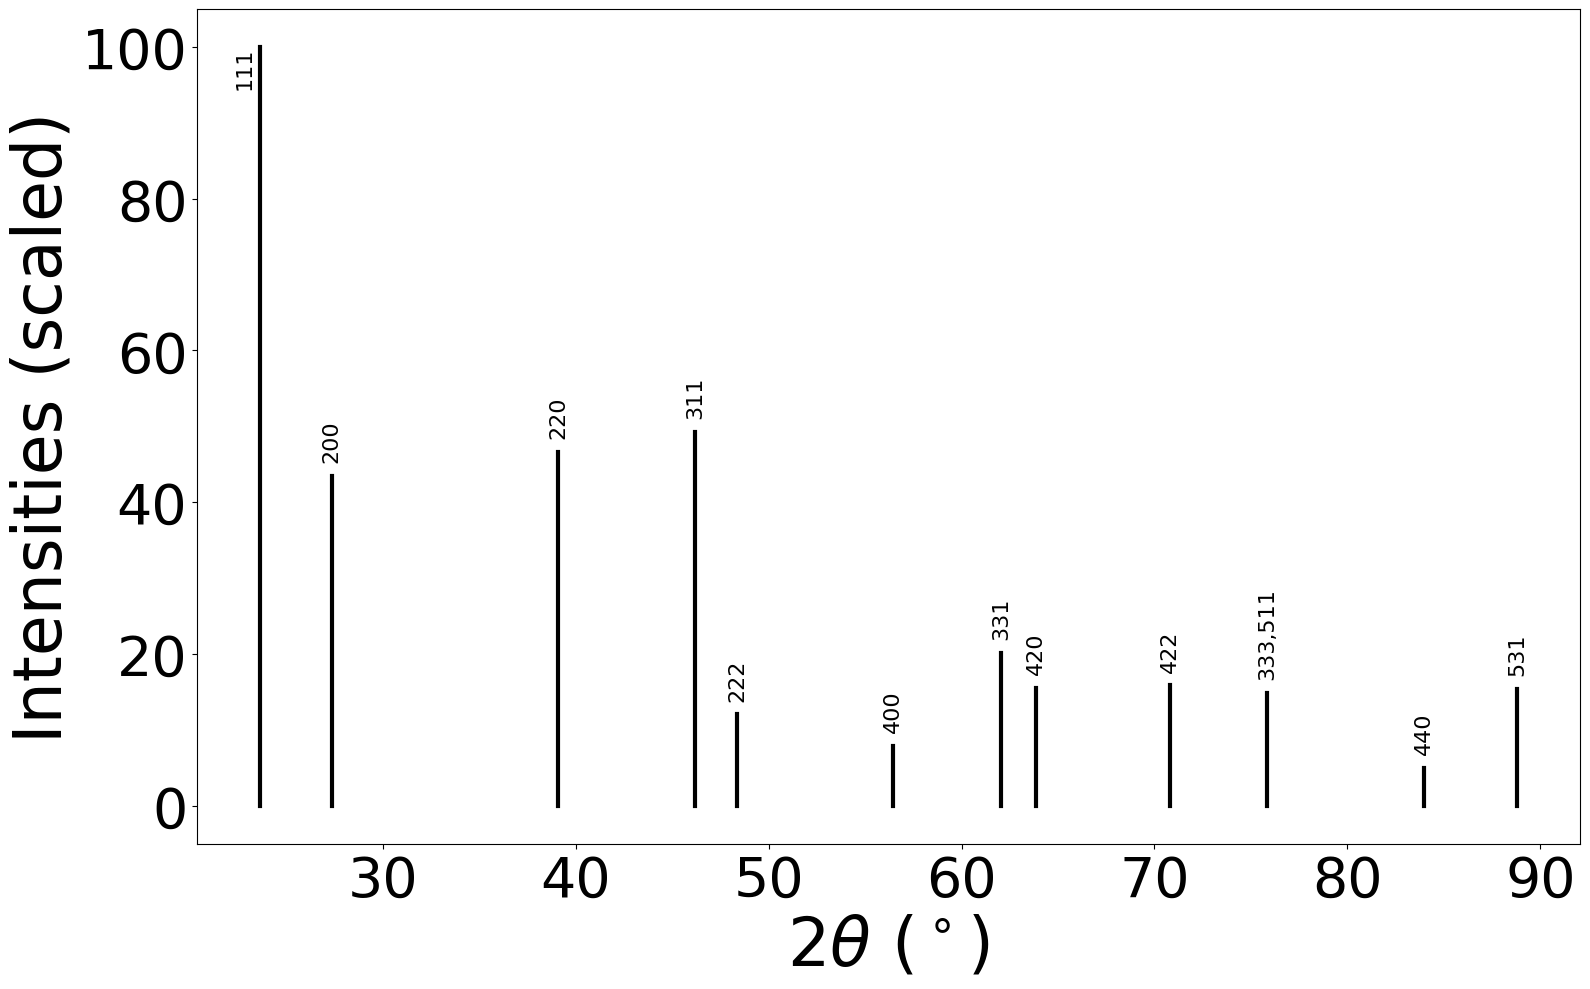

In [11]:
XRD.get_plot(conv_struc, )